## online_retail_II (K--Mean--Clustring)
## RFM (Recency,Frequency and Montetary) Clustering Dataset Project Date 28-Feb-2025

## 1. Importing Necessary Libarary

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2.Importing Dataset

In [3]:
df = pd.read_excel(r'C:\Users\DELL\Downloads\online_retail_II.xlsx')

In [5]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## 3(a). Data Inspection

### (b). Cheak Rows (Top and Bottom)

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [14]:
df.shape

(525461, 8)

In [16]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [18]:
len(df)

525461

### (e).cheak Descriptive Stats (Describe)

In [21]:
df.describe () 

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [25]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [27]:
df1 = df.drop(['Invoice','StockCode','Country','Description'],axis=1,inplace=True)

In [29]:
df

,Quantity,InvoiceDate,Price,Customer ID
0,12,2009-12-01 07:45:00,6.95,13085.0
1,12,2009-12-01 07:45:00,6.75,13085.0
2,12,2009-12-01 07:45:00,6.75,13085.0
3,48,2009-12-01 07:45:00,2.10,13085.0
4,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...
525456,2,2010-12-09 20:01:00,2.95,17530.0
525457,1,2010-12-09 20:01:00,3.75,17530.0
525458,1,2010-12-09 20:01:00,3.75,17530.0
525459,2,2010-12-09 20:01:00,3.75,17530.0


In [31]:
df = df.dropna(subset=['Customer ID'])

In [33]:
df['Customer ID'].fillna(0, inplace=True)

In [35]:
print(df.isnull().sum())

Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64


In [37]:
amount = pd.DataFrame(df.Quantity * df.Price, columns = ["Amount"])
amount.head()

,Amount
0,83.4
1,81.0
2,81.0
3,100.8
4,30.0


In [39]:
# merging amount in order_wise
df1 = pd.concat(objs = [df,  amount], axis = 1, ignore_index = False)

## Monetary Function

In [42]:
# Monetary Function
# Finding total amount spent per customer
monetary = df1.groupby("Customer ID").Amount.sum()
monetary = monetary.reset_index()
monetary.head() 


,Customer ID,Amount
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93


## Frequency Value

In [45]:
## Frequency Value
frequency = df1[['Customer ID','InvoiceDate']]

In [47]:
#Getting the count of orders made by each cusmtomer based on customer ID
k = frequency.groupby('Customer ID').InvoiceDate.count()
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ["Customer ID" ,"Frequency"]
k.head()

,Customer ID,Frequency
0,12346.0,46
1,12347.0,71
2,12348.0,20
3,12349.0,107
4,12351.0,21


In [49]:
##Merging amount and frequency
master=monetary.merge(k,on ="Customer ID",how="inner")
master.head()

,Customer ID,Amount,Frequency
0,12346.0,-64.68,46
1,12347.0,1323.32,71
2,12348.0,222.16,20
3,12349.0,2646.99,107
4,12351.0,300.93,21


In [51]:
recency = df1[['Customer ID','InvoiceDate']]
maximum = max(recency.InvoiceDate)

In [52]:
#generating recency function
#filtering data for customerid and invoice_date
recency= df1[["Customer ID","InvoiceDate"]]
#finding max data (latest date nikalna hai ki ow kb aya )
maximum=max(recency.InvoiceDate)
recency['maximum'] = max(recency.InvoiceDate)

#adding one more day to the max date , so that the max date will have 1 as the difference and not zero.
maximum=maximum+pd.DateOffset(days=1)
recency['diff']=maximum-recency.InvoiceDate
recency.head()

,Customer ID,InvoiceDate,maximum,diff
0,13085.0,2009-12-01 07:45:00,2010-12-09 20:01:00,374 days 12:16:00
1,13085.0,2009-12-01 07:45:00,2010-12-09 20:01:00,374 days 12:16:00
2,13085.0,2009-12-01 07:45:00,2010-12-09 20:01:00,374 days 12:16:00
3,13085.0,2009-12-01 07:45:00,2010-12-09 20:01:00,374 days 12:16:00
4,13085.0,2009-12-01 07:45:00,2010-12-09 20:01:00,374 days 12:16:00


In [53]:
# rencency by customerid
a = recency.groupby('Customer ID')

In [55]:
a['diff'].min()

Customer ID
12346.0    67 days 03:28:00
12347.0     3 days 05:04:00
12348.0    74 days 05:02:00
12349.0    43 days 11:38:00
12351.0    11 days 04:38:00
                 ...       
18283.0    18 days 04:31:00
18284.0    65 days 07:30:00
18285.0   296 days 09:37:00
18286.0   112 days 08:04:00
18287.0    18 days 08:10:00
Name: diff, Length: 4383, dtype: timedelta64[ns]

In [56]:
# Dataframe merging by recency ' 
df = pd.DataFrame(recency.groupby('Customer ID')["diff"].min())
df = df.reset_index()
df.columns = ["Customer ID","Recency"]
df.head()

,Customer ID,Recency
0,12346.0,67 days 03:28:00
1,12347.0,3 days 05:04:00
2,12348.0,74 days 05:02:00
3,12349.0,43 days 11:38:00
4,12351.0,11 days 04:38:00


## RFM Combined DataFrame

In [58]:
# combilning all  recency,frequency and monetary parameters
# RFM = k.merge(monetary, on = ('Customer ID'))
RFM = pd.merge(left=df, right=master , on = 'Customer ID')

In [64]:
RFM

,Customer ID,Recency,Amount,Frequency
0,12346.0,67 days 03:28:00,-64.68,46
1,12347.0,3 days 05:04:00,1323.32,71
2,12348.0,74 days 05:02:00,222.16,20
3,12349.0,43 days 11:38:00,2646.99,107
4,12351.0,11 days 04:38:00,300.93,21
...,...,...,...,...
4378,18283.0,18 days 04:31:00,641.77,230
4379,18284.0,65 days 07:30:00,436.68,29
4380,18285.0,296 days 09:37:00,427.00,12
4381,18286.0,112 days 08:04:00,1188.43,70


# outlier

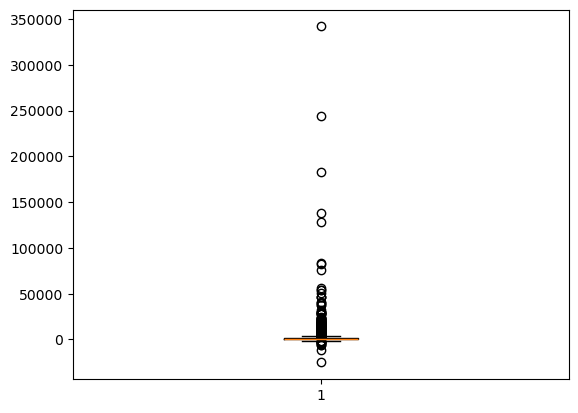

In [67]:
# outlier treatment for Amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

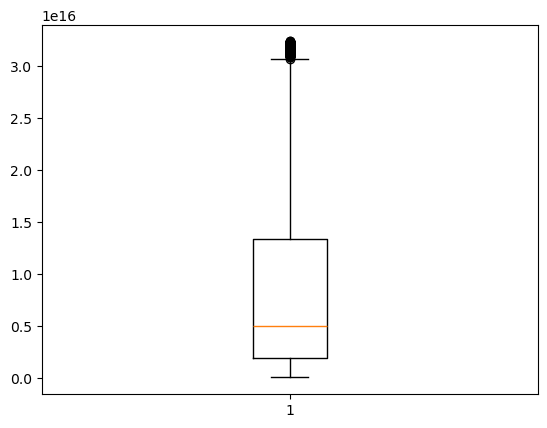

In [68]:
# outlier treatment for Amount
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

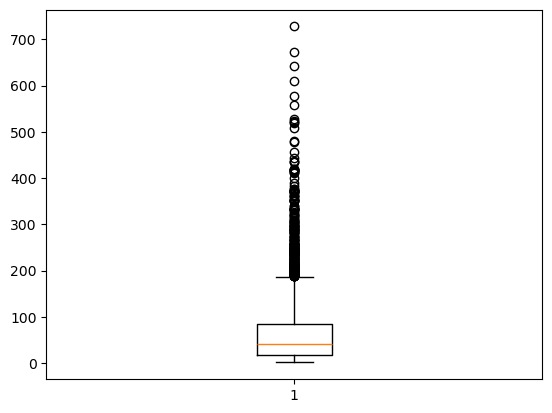

In [70]:
# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

## Scaling the RFM data

# Standardise all parameters

In [75]:
RFM_norm1 = RFM.drop('Customer ID',axis =1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler =  StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [77]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Recency','Amount','Frequency']
RFM_norm1.head()

,Recency,Amount,Frequency
0,-0.294127,-1.124302,-0.086061
1,-1.004192,0.671019,0.481066
2,-0.216463,-0.753286,-0.675873
3,-0.560401,2.383131,1.297728
4,-0.915434,-0.651401,-0.653188


## K- Means with K=5

In [80]:
# K- means with K=5
from sklearn.cluster import KMeans
model_clus5 = KMeans (n_clusters = 5, max_iter=50)  # max_iter --this is the centoired shift limit 50
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=5)

In [81]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))

In [82]:
RFM_km = pd.concat([RFM, pd.Series(model_clus5. labels_)], axis = 1)

In [84]:
RFM_km.columns = ['Customer ID','Recency','Amount','Frequency','ClusterID']

In [87]:
RFM_km.Recency = RFM_km.Recency.dt.days

In [88]:
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())

In [89]:
km_clusters_Frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())


In [94]:
km_clusters_Recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [96]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_Frequency, km_clusters_Recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,394.212161,25.740819,52.802260
1,1,818.462491,120.430034,45.174061
2,2,339.003475,22.865273,233.351916
3,3,1379.095771,63.004702,48.293103
4,4,2502.347011,127.902778,38.650000


<Axes: xlabel='ClusterID', ylabel='Amount_mean'>

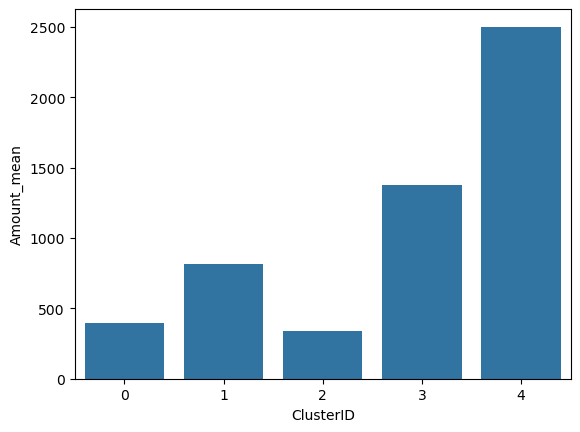

In [98]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

<Axes: xlabel='ClusterID', ylabel='Frequency_mean'>

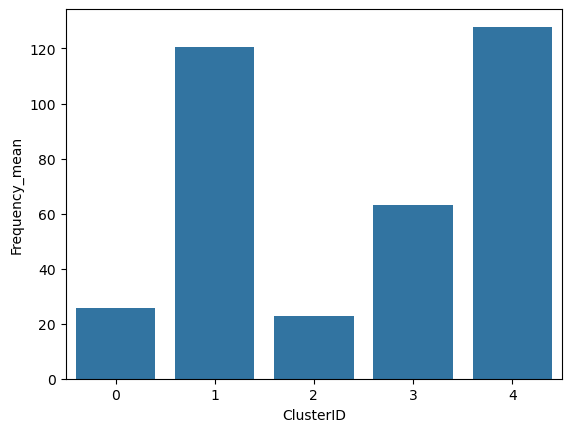

In [100]:
sns.barplot(x=df.ClusterID, y =df.Frequency_mean)

<Axes: xlabel='ClusterID', ylabel='Recency_mean'>

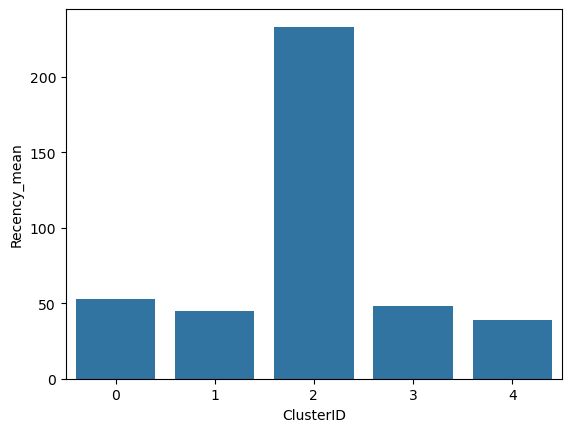

In [102]:
sns.barplot(x=df.ClusterID, y =df.Recency_mean)

In [104]:

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

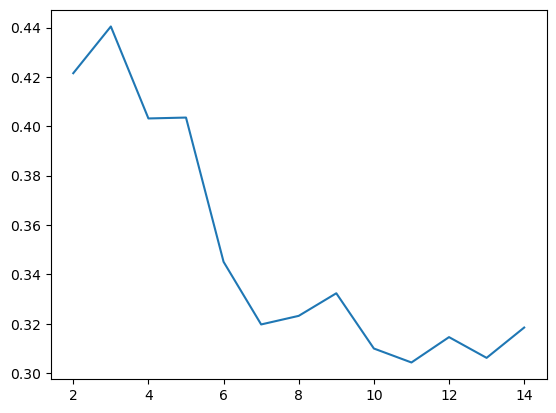

In [106]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

In [114]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculation  WCSS for differnet values of k 
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++' , random_state = 42)
    kmeans .fit(RFM_norm1)
    WCSS.append(kmeans.inertia_) # Inertia is the same as WCSS

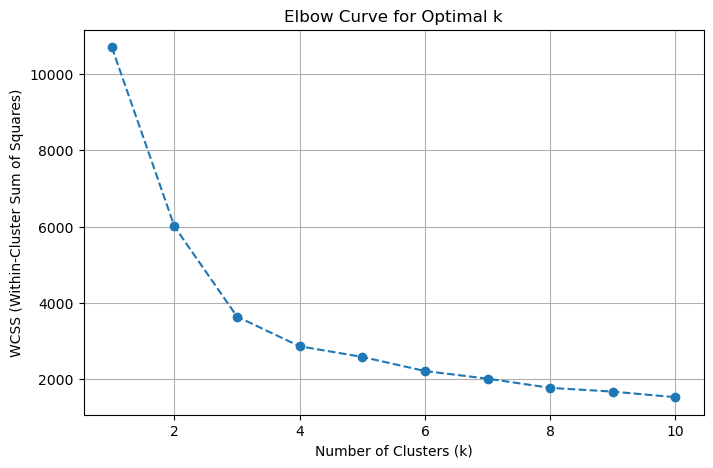

In [116]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), WCSS, marker='o', linestyle='--')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()